In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

train_url = "/content/sample_data/NSL_KDD_Train.csv"
test_url = "/content/sample_data/NSL_KDD_Test.csv"
df = pd.read_csv(train_url, header=None, names=col_names)
df_test = pd.read_csv(test_url, header=None, names=col_names)

df.to_csv('/content/training_data.csv', index=False)
df_test.to_csv('/content/testing_data.csv', index=False)


# files.download('/content/training_data.csv')
# files.download('/content/testing_data.csv')

print('Dimensions of the Training set:', df.shape)
print('Dimensions of the Test set:', df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

In [ ]:
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())
print('Distribution of categories in protocol_type:')
print(df['protocol_type'].value_counts().sort_values(ascending=False).head())
print('Distribution of categories in flag:')
print(df['flag'].value_counts().sort_values(ascending=False).head())
print('Distribution of categories in label:')
print(df['label'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64
Distribution of categories in protocol_type:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
Distribution of categories in flag:
flag
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: count, dtype: int64
Distribution of categories in label:
label
normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: count, dtype: int64


In [ ]:
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:

unique_protocol = sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
print(unique_protocol2)


unique_service = sorted(df.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
print(unique_service2)

unique_flag = sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]
print(unique_flag2)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [ ]:
# Combine all column
dumcols = unique_protocol2 + unique_service2 + unique_flag2


In [ ]:
# Do the same for the test set
unique_service_test = sorted(df_test.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2


In [ ]:
df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)


In [ ]:
print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())


  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)


In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns=dumcols)


In [ ]:
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=testdumcols)


In [ ]:
df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_aol',
 'service_urh_i',
 'service_red_i',
 'service_http_8001',
 'service_harvest']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test


<ipython-input-23-e0d9126c3ed8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
<ipython-input-23-e0d9126c3ed8>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm

In [ ]:

newdf = newdf[[col for col in newdf.columns if col != 'label'] + ['label']]


newdf_test = newdf_test[[col for col in newdf_test.columns if col != 'label'] + ['label']]


In [ ]:
from google.colab import files


newdf.to_csv('processed_train.csv', index=False)
files.download('processed_train.csv')


newdf_test.to_csv('processed_test.csv', index=False)
files.download('processed_test.csv')


In [ ]:

def move_label_to_right(df):
    return df[[col for col in df.columns if col != 'label'] + ['label']]

to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

DoS_df = newdf[newdf['label'].isin(to_drop_DoS)]
Probe_df = newdf[newdf['label'].isin(to_drop_Probe)]
R2L_df = newdf[newdf['label'].isin(to_drop_R2L)]
U2R_df = newdf[newdf['label'].isin(to_drop_U2R)]


DoS_df_test = newdf_test[newdf_test['label'].isin(to_drop_DoS)]
Probe_df_test = newdf_test[newdf_test['label'].isin(to_drop_Probe)]
R2L_df_test = newdf_test[newdf_test['label'].isin(to_drop_R2L)]
U2R_df_test = newdf_test[newdf_test['label'].isin(to_drop_U2R)]


DoS_df = move_label_to_right(DoS_df)
Probe_df = move_label_to_right(Probe_df)
R2L_df = move_label_to_right(R2L_df)
U2R_df = move_label_to_right(U2R_df)

DoS_df_test = move_label_to_right(DoS_df_test)
Probe_df_test = move_label_to_right(Probe_df_test)
R2L_df_test = move_label_to_right(R2L_df_test)
U2R_df_test = move_label_to_right(U2R_df_test)


print('Train:')
print('Dimensions of DoS:', DoS_df.shape)
print('Dimensions of Probe:', Probe_df.shape)
print('Dimensions of R2L:', R2L_df.shape)
print('Dimensions of U2R:', U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:', DoS_df_test.shape)
print('Dimensions of Probe:', Probe_df_test.shape)
print('Dimensions of R2L:', R2L_df_test.shape)
print('Dimensions of U2R:', U2R_df_test.shape)


Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


In [ ]:
from google.colab import files


print("DoS Train DataFrame:")
print(DoS_df.head(), "\n")

print("Probe Train DataFrame:")
print(Probe_df.head(), "\n")

print("R2L Train DataFrame:")
print(R2L_df.head(), "\n")

print("U2R Train DataFrame:")
print(U2R_df.head(), "\n")


# DoS_df.to_csv('DoS_train.csv', index=False)
# files.download('DoS_train.csv')

# Probe_df.to_csv('Probe_train.csv', index=False)
# files.download('Probe_train.csv')

# R2L_df.to_csv('R2L_train.csv', index=False)
# files.download('R2L_train.csv')

# U2R_df.to_csv('U2R_train.csv', index=False)
# files.download('U2R_train.csv')

# Print heads of test datasets
print("DoS Test DataFrame:")
print(DoS_df_test.head(), "\n")

print("Probe Test DataFrame:")
print(Probe_df_test.head(), "\n")

print("R2L Test DataFrame:")
print(R2L_df_test.head(), "\n")

print("U2R Test DataFrame:")
print(U2R_df_test.head(), "\n")

# DoS_df_test.to_csv('DoS_test.csv', index=False)
# files.download('DoS_test.csv')

Probe_df_test.to_csv('Probe_test.csv', index=False)
files.download('Probe_test.csv')

# R2L_df_test.to_csv('R2L_test.csv', index=False)
# files.download('R2L_test.csv')

# U2R_df_test.to_csv('U2R_test.csv', index=False)
# files.download('U2R_test.csv')


DoS Train DataFrame:
   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  flag_RSTOS0  \
0                  0          0                0  ...        0.0          0.0   
1                  0          0                0  ...        0.0          0.0   
2                  0          0                0  ...        0.0          0.0   
3                  0          1                0  ...        0.0          0.0   
4                  0          1                0  ...        0.0          0.0   

   flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_DoS = DoS_df.drop('label', axis=1)
X_Probe = Probe_df.drop('label', axis=1)
X_R2L = R2L_df.drop('label', axis=1)
X_U2R = U2R_df.drop('label', axis=1)

X_DoS_test = DoS_df_test.drop('label', axis=1)
X_Probe_test = Probe_df_test.drop('label', axis=1)
X_R2L_test = R2L_df_test.drop('label', axis=1)
X_U2R_test = U2R_df_test.drop('label', axis=1)


Apply Standardization to Training Data:

Standardization (Z-score normalization) transforms data to have zero mean and unit variance.
Each feature is scaled independently.

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)


from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)


scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [ ]:
import pandas as pd
from google.colab import files


def shift_label_right(df, label_column='label'):
    if label_column in df.columns:

        new_columns = [col for col in df.columns if col != label_column] + [label_column]
        df = df[new_columns]
    return df

X_DoS_df = shift_label_right(pd.DataFrame(X_DoS, columns=colNames))
X_Probe_df = shift_label_right(pd.DataFrame(X_Probe, columns=colNames))
X_R2L_df = shift_label_right(pd.DataFrame(X_R2L, columns=colNames))
X_U2R_df = shift_label_right(pd.DataFrame(X_U2R, columns=colNames))

X_DoS_test_df = shift_label_right(pd.DataFrame(X_DoS_test, columns=colNames_test))
X_Probe_test_df = shift_label_right(pd.DataFrame(X_Probe_test, columns=colNames_test))
X_R2L_test_df = shift_label_right(pd.DataFrame(X_R2L_test, columns=colNames_test))
X_U2R_test_df = shift_label_right(pd.DataFrame(X_U2R_test, columns=colNames_test))


X_DoS_df.to_csv('X_DoS_train_scaled.csv', index=False)
X_Probe_df.to_csv('X_Probe_train_scaled.csv', index=False)
X_R2L_df.to_csv('X_R2L_train_scaled.csv', index=False)
X_U2R_df.to_csv('X_U2R_train_scaled.csv', index=False)

X_DoS_test_df.to_csv('X_DoS_test_scaled.csv', index=False)
X_Probe_test_df.to_csv('X_Probe_test_scaled.csv', index=False)
X_R2L_test_df.to_csv('X_R2L_test_scaled.csv', index=False)
X_U2R_test_df.to_csv('X_U2R_test_scaled.csv', index=False)


files.download('X_DoS_train_scaled.csv')
files.download('X_Probe_train_scaled.csv')
files.download('X_R2L_train_scaled.csv')
files.download('X_U2R_train_scaled.csv')

files.download('X_DoS_test_scaled.csv')
files.download('X_Probe_test_scaled.csv')
files.download('X_R2L_test_scaled.csv')
files.download('X_U2R_test_scaled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from google.colab import files


train_path = '/content/sample_data/DoS_train.csv'
test_path = '/content/sample_data/DoS_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']


X_test = X_test.reindex(columns=X_train.columns)

# Initialize the estimator and RFE
estimator = LogisticRegression(solver='liblinear')
n_features_to_select = 5  # Adjust based on your needs

rfe = RFE(estimator, n_features_to_select=n_features_to_select)


rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)

X_train_selected = pd.DataFrame(rfe.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(rfe.transform(X_test), columns=selected_features)


X_train_selected['label'] = y_train.values
X_test_selected['label'] = y_test.values


train_output_file = '/content/selected_features_DOS_train.csv'
test_output_file = '/content/selected_features_Dos_test.csv'

X_train_selected.to_csv(train_output_file, index=False)
X_test_selected.to_csv(test_output_file, index=False)

print("\nFiles saved. Downloading now...")


files.download(train_output_file)
files.download(test_output_file)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Selected features:
Index(['same_srv_rate', 'diff_srv_rate', 'dst_host_srv_serror_rate',
       'service_ecr_i', 'service_urp_i'],
      dtype='object')

Files saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from google.colab import files

train_path = '/content/sample_data/R2L_train.csv'
test_path = '/content/sample_data/R2L_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']


X_test = X_test.reindex(columns=X_train.columns)


estimator = LogisticRegression(solver='liblinear')
n_features_to_select = 5  # Adjust based on your needs

rfe = RFE(estimator, n_features_to_select=n_features_to_select)


rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)


X_train_selected = pd.DataFrame(rfe.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(rfe.transform(X_test), columns=selected_features)


X_train_selected['label'] = y_train.values
X_test_selected['label'] = y_test.values


train_output_file = '/content/selected_features_R2L_train.csv'
test_output_file = '/content/selected_features_R2L_test.csv'

X_train_selected.to_csv(train_output_file, index=False)
X_test_selected.to_csv(test_output_file, index=False)

print("\nFiles saved. Downloading now...")


files.download(train_output_file)
files.download(test_output_file)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Selected features:
Index(['is_guest_login', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'service_imap4', 'flag_RSTO'],
      dtype='object')

Files saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from google.colab import files


train_path = '/content/sample_data/Probe_train.csv'
test_path = '/content/sample_data/Probe_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']


X_test = X_test.reindex(columns=X_train.columns)


estimator = LogisticRegression(solver='liblinear')
n_features_to_select = 5

rfe = RFE(estimator, n_features_to_select=n_features_to_select)


rfe.fit(X_train, y_train)


selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)


X_train_selected = pd.DataFrame(rfe.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(rfe.transform(X_test), columns=selected_features)


X_train_selected['label'] = y_train.values
X_test_selected['label'] = y_test.values


train_output_file = '/content/selected_features_Probe_train.csv'
test_output_file = '/content/selected_features_Probe_test.csv'

X_train_selected.to_csv(train_output_file, index=False)
X_test_selected.to_csv(test_output_file, index=False)

print("\nFiles saved. Downloading now...")


files.download(train_output_file)
files.download(test_output_file)


Selected features:
Index(['dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_eco_i',
       'service_http', 'service_private'],
      dtype='object')

Files saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from google.colab import files


train_path = '/content/sample_data/U2R_train.csv'
test_path = '/content/sample_data/U2R_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']


X_test = X_test.reindex(columns=X_train.columns)


estimator = LogisticRegression(solver='liblinear')
n_features_to_select = 5

rfe = RFE(estimator, n_features_to_select=n_features_to_select)


rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected features:")
print(selected_features)


X_train_selected = pd.DataFrame(rfe.transform(X_train), columns=selected_features)
X_test_selected = pd.DataFrame(rfe.transform(X_test), columns=selected_features)


X_train_selected['label'] = y_train.values
X_test_selected['label'] = y_test.values

# Save the transformed data to CSV files
train_output_file = '/content/selected_features_U2R_train.csv'
test_output_file = '/content/selected_features_U2R_test.csv'

X_train_selected.to_csv(train_output_file, index=False)
X_test_selected.to_csv(test_output_file, index=False)

print("\nFiles saved. Downloading now...")

# Download the files (works in Google Colab)
files.download(train_output_file)
files.download(test_output_file)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Selected features:
Index(['root_shell', 'su_attempted', 'dst_host_same_src_port_rate',
       'service_http', 'service_telnet'],
      dtype='object')

Files saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R2L

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


train_path = '/content/selected_features_R2L_train.csv'
train_df = pd.read_csv(train_path)


print("Train dataset shape:", train_df.shape)
print(train_df['label'].value_counts())


data_label3 = train_df[train_df['label'] == 3].drop('label', axis=1)


data_label3 = data_label3.values


scaler = MinMaxScaler()
data_label3_scaled = scaler.fit_transform(data_label3)


data_dim = data_label3_scaled.shape[1]
print("Data dimension:", data_dim)
print("Number of label=3 samples:", data_label3_scaled.shape[0])


Train dataset shape: (68338, 6)
label
0    67343
3      995
Name: count, dtype: int64
Data dimension: 5
Number of label=3 samples: 995


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

latent_dim = 100
num_classes = 4


def build_generator(latent_dim, num_classes, data_dim):
    noise_input = layers.Input(shape=(latent_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')


    label_embedding = layers.Embedding(num_classes, latent_dim, input_length=1)(label_input)
    label_embedding = layers.Flatten()(label_embedding)


    model_input = layers.multiply([noise_input, label_embedding])

    x = layers.Dense(128, activation='relu')(model_input)
    x = layers.Dense(256, activation='relu')(x)

    x = layers.Dense(data_dim, activation='sigmoid')(x)

    generator = models.Model([noise_input, label_input], x, name="generator")
    return generator


def build_discriminator(data_dim, num_classes):
    data_input = layers.Input(shape=(data_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')

    label_embedding = layers.Embedding(num_classes, data_dim)(label_input)
    label_embedding = layers.Flatten()(label_embedding)


    model_input = layers.multiply([data_input, label_embedding])

    x = layers.Dense(256, activation='relu')(model_input)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    discriminator = models.Model([data_input, label_input], x, name="discriminator")
    return discriminator


generator = build_generator(latent_dim, num_classes, data_dim)
discriminator = build_discriminator(data_dim, num_classes)


discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


noise_input = layers.Input(shape=(latent_dim,))
label_input = layers.Input(shape=(1,), dtype='int32')
generated_data = generator([noise_input, label_input])


discriminator.trainable = False
validity = discriminator([generated_data, label_input])

combined = models.Model([noise_input, label_input], validity, name="combined")
combined.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
epochs = 10000
batch_size = 32
sample_interval = 1000

num_samples = data_label3_scaled.shape[0]

for epoch in range(epochs):


    idx = np.random.randint(0, num_samples, batch_size)
    real_data = data_label3_scaled[idx]
    real_labels = np.full((batch_size, 1), 3)


    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels = np.full((batch_size, 1), 3)
    gen_data = generator.predict([noise, fake_labels], verbose=0)


    d_loss_real = discriminator.train_on_batch([real_data, real_labels], np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch([gen_data, fake_labels], np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch([noise, fake_labels], valid_y)


    if epoch % sample_interval == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f} - acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.6926 - acc: 25.00%] [G loss: 0.6965]
Epoch 1000 [D loss: 0.6933 - acc: 49.99%] [G loss: 0.6933]
Epoch 2000 [D loss: 0.6933 - acc: 49.99%] [G loss: 0.6932]
Epoch 3000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]
Epoch 4000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]
Epoch 5000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]
Epoch 6000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6931]
Epoch 7000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]
Epoch 8000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]
Epoch 9000 [D loss: 0.6933 - acc: 50.00%] [G loss: 0.6932]


In [ ]:
generator_losses = [0.6965, 0.6933, 0.6932, 0.6932, 0.6932, 0.6932, 0.6931, 0.6932, 0.6932, 0.6932]
discriminator_losses = [0.6926, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933]
epochs = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]


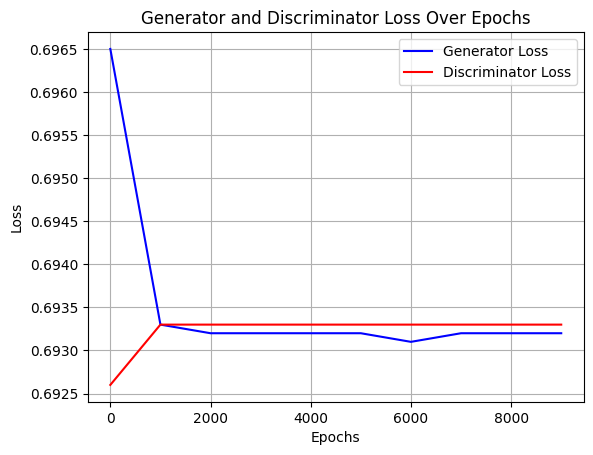

In [ ]:
import matplotlib.pyplot as plt


plt.plot(epochs, generator_losses, label="Generator Loss", color='blue')
plt.plot(epochs, discriminator_losses, label="Discriminator Loss", color='red')


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Over Epochs")
plt.legend()
plt.grid(True)


plt.show()


In [ ]:
num_new_samples = 30000


noise = np.random.normal(0, 1, (num_new_samples, latent_dim))
gen_labels = np.full((num_new_samples, 1), 3)
synthetic_data_scaled = generator.predict([noise, gen_labels], verbose=0)


synthetic_data = scaler.inverse_transform(synthetic_data_scaled)


feature_columns = train_df.drop('label', axis=1).columns
synthetic_df = pd.DataFrame(synthetic_data, columns=feature_columns)
synthetic_df['label'] = 3

print("Synthetic data generated for label = 3:", synthetic_df.shape)


Synthetic data generated for label = 3: (30000, 6)


In [ ]:
from google.colab import files

synthetic_output_R2L_file = '/content/synthetic_label3_R2L.csv'
synthetic_df.to_csv(synthetic_output_R2L_file, index=False)
print("Synthetic file saved. Downloading now...")

files.download(synthetic_output_R2L_file)


Synthetic file saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Probe

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


train_path = '/content/selected_features_Probe_train.csv'
train_df = pd.read_csv(train_path)


print("Actual Probe train data shape:", train_df.shape)
print("Label distribution in actual train data:")
print(train_df['label'].value_counts())


data_label2 = train_df[train_df['label'] == 2].drop('label', axis=1)


data_label2 = data_label2.values


scaler = MinMaxScaler()
data_label2_scaled = scaler.fit_transform(data_label2)


data_dim = data_label2_scaled.shape[1]
print("Feature dimension:", data_dim)
print("Number of label=2 samples:", data_label2_scaled.shape[0])


Actual Probe train data shape: (78999, 6)
Label distribution in actual train data:
label
0    67343
2    11656
Name: count, dtype: int64
Feature dimension: 5
Number of label=2 samples: 11656


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

latent_dim = 100
num_classes = 4


def build_generator(latent_dim, num_classes, data_dim):
    noise_input = layers.Input(shape=(latent_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')


    label_embedding = layers.Embedding(num_classes, latent_dim, input_length=1)(label_input)
    label_embedding = layers.Flatten()(label_embedding)


    model_input = layers.multiply([noise_input, label_embedding])

    x = layers.Dense(128, activation='relu')(model_input)
    x = layers.Dense(256, activation='relu')(x)

    x = layers.Dense(data_dim, activation='sigmoid')(x)

    generator = models.Model([noise_input, label_input], x, name="generator")
    return generator


def build_discriminator(data_dim, num_classes):
    data_input = layers.Input(shape=(data_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')


    label_embedding = layers.Embedding(num_classes, data_dim)(label_input)
    label_embedding = layers.Flatten()(label_embedding)


    model_input = layers.multiply([data_input, label_embedding])

    x = layers.Dense(256, activation='relu')(model_input)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    discriminator = models.Model([data_input, label_input], x, name="discriminator")
    return discriminator

discriminator = build_discriminator(data_dim, num_classes)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


generator = build_generator(latent_dim, num_classes, data_dim)


noise_input = layers.Input(shape=(latent_dim,))
label_input = layers.Input(shape=(1,), dtype='int32')
generated_data = generator([noise_input, label_input])


discriminator.trainable = False
validity = discriminator([generated_data, label_input])

combined = models.Model([noise_input, label_input], validity, name="combined")
combined.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
epochs = 5000
batch_size = 32
sample_interval = 1000

num_samples = data_label2_scaled.shape[0]

for epoch in range(epochs):


    idx = np.random.randint(0, num_samples, batch_size)
    real_data = data_label2_scaled[idx]
    real_labels = np.full((batch_size, 1), 2)


    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels = np.full((batch_size, 1), 2)
    gen_data = generator.predict([noise, fake_labels], verbose=0)


    d_loss_real = discriminator.train_on_batch([real_data, real_labels], np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch([gen_data, fake_labels], np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)



    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch([noise, fake_labels], valid_y)


    if epoch % sample_interval == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.6925, acc: 75.00%] [G loss: 0.6923]
Epoch 1000 [D loss: 0.6937, acc: 49.65%] [G loss: 0.6905]
Epoch 2000 [D loss: 0.6937, acc: 49.62%] [G loss: 0.6905]
Epoch 3000 [D loss: 0.6938, acc: 49.62%] [G loss: 0.6905]
Epoch 4000 [D loss: 0.6938, acc: 49.62%] [G loss: 0.6905]


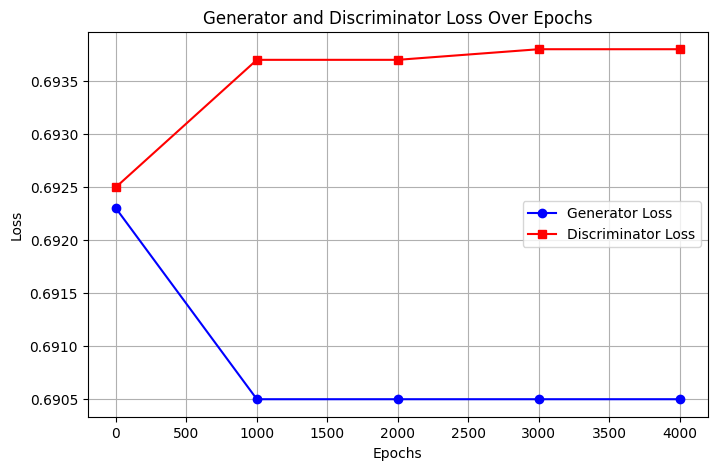

In [ ]:
import matplotlib.pyplot as plt

epochs = [0, 1000, 2000, 3000, 4000]
generator_losses = [0.6923, 0.6905, 0.6905, 0.6905, 0.6905]
discriminator_losses = [0.6925, 0.6937, 0.6937, 0.6938, 0.6938]

plt.figure(figsize=(8, 5))
plt.plot(epochs, generator_losses, label="Generator Loss", color='blue', marker='o')
plt.plot(epochs, discriminator_losses, label="Discriminator Loss", color='red', marker='s')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:

num_new_samples = 30000


noise = np.random.normal(0, 1, (num_new_samples, latent_dim))
gen_labels = np.full((num_new_samples, 1), 2)
synthetic_data_scaled = generator.predict([noise, gen_labels], verbose=0)


synthetic_data = scaler.inverse_transform(synthetic_data_scaled)

feature_columns = train_df.drop('label', axis=1).columns
synthetic_df = pd.DataFrame(synthetic_data, columns=feature_columns)
synthetic_df['label'] = 2

print("Synthetic data generated for label = 2:", synthetic_df.shape)


Synthetic data generated for label = 2: (30000, 6)


In [ ]:
from google.colab import files

synthetic_output_Probe_file = '/content/synthetic_label2_Probe.csv'
synthetic_df.to_csv(synthetic_output_Probe_file, index=False)
print("Synthetic file saved. Downloading now...")

files.download(synthetic_output_Probe_file)


Synthetic file saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

U2R

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

test_path = '/content/selected_features_U2R_test.csv'
test_df = pd.read_csv(test_path)

print("Actual U2R test data shape:", test_df.shape)
print("Label distribution in actual U2R test data:")
print(test_df['label'].value_counts())

data_label4 = test_df[test_df['label'] == 4].drop('label', axis=1)

data_label4 = data_label4.values

scaler = MinMaxScaler()
data_label4_scaled = scaler.fit_transform(data_label4)

data_dim = data_label4_scaled.shape[1]
print("Feature dimension:", data_dim)
print("Number of label=4 samples:", data_label4_scaled.shape[0])


Actual U2R test data shape: (9778, 6)
Label distribution in actual U2R test data:
label
0    9711
4      67
Name: count, dtype: int64
Feature dimension: 5
Number of label=4 samples: 67


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

latent_dim = 100
num_classes = 5

def build_generator(latent_dim, num_classes, data_dim):
    noise_input = layers.Input(shape=(latent_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')

    label_embedding = layers.Embedding(num_classes, latent_dim, input_length=1)(label_input)
    label_embedding = layers.Flatten()(label_embedding)

    model_input = layers.multiply([noise_input, label_embedding])

    x = layers.Dense(128, activation='relu')(model_input)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(data_dim, activation='sigmoid')(x)

    generator = models.Model([noise_input, label_input], x, name="generator")
    return generator

def build_discriminator(data_dim, num_classes):
    data_input = layers.Input(shape=(data_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')

    label_embedding = layers.Embedding(num_classes, data_dim)(label_input)
    label_embedding = layers.Flatten()(label_embedding)

    model_input = layers.multiply([data_input, label_embedding])

    x = layers.Dense(256, activation='relu')(model_input)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    discriminator = models.Model([data_input, label_input], x, name="discriminator")
    return discriminator

discriminator = build_discriminator(data_dim, num_classes)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator = build_generator(latent_dim, num_classes, data_dim)

noise_input = layers.Input(shape=(latent_dim,))
label_input = layers.Input(shape=(1,), dtype='int32')
generated_data = generator([noise_input, label_input])

discriminator.trainable = False
validity = discriminator([generated_data, label_input])

combined = models.Model([noise_input, label_input], validity, name="combined")
combined.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
epochs = 5000
batch_size = 32
sample_interval = 1000

num_samples = data_label4_scaled.shape[0]

for epoch in range(epochs):



    idx = np.random.randint(0, num_samples, batch_size)
    real_data = data_label4_scaled[idx]
    real_labels = np.full((batch_size, 1), 4)


    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels = np.full((batch_size, 1), 4)
    gen_data = generator.predict([noise, fake_labels], verbose=0)


    d_loss_real = discriminator.train_on_batch([real_data, real_labels], np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch([gen_data, fake_labels], np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)



    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = combined.train_on_batch([noise, fake_labels], valid_y)


    if epoch % sample_interval == 0:
        print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 [D loss: 0.6932, acc: 72.66%] [G loss: 0.6923]
Epoch 1000 [D loss: 0.6938, acc: 47.76%] [G loss: 0.6915]
Epoch 2000 [D loss: 0.6938, acc: 47.74%] [G loss: 0.6915]
Epoch 3000 [D loss: 0.6938, acc: 47.73%] [G loss: 0.6914]
Epoch 4000 [D loss: 0.6938, acc: 47.75%] [G loss: 0.6914]


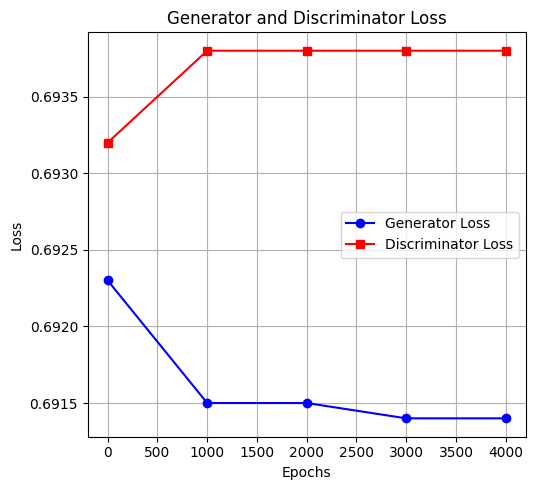

In [ ]:
import matplotlib.pyplot as plt


epochs = [0, 1000, 2000, 3000, 4000]


generator_losses = [0.6923, 0.6915, 0.6915, 0.6914, 0.6914]
discriminator_losses = [0.6932, 0.6938, 0.6938, 0.6938, 0.6938]


discriminator_acc = [72.66, 47.76, 47.74, 47.73, 47.75]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, generator_losses, label="Generator Loss", color='blue', marker='o')
plt.plot(epochs, discriminator_losses, label="Discriminator Loss", color='red', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


In [ ]:
num_new_samples = 40000

noise = np.random.normal(0, 1, (num_new_samples, latent_dim))
gen_labels = np.full((num_new_samples, 1), 4)
synthetic_data_scaled = generator.predict([noise, gen_labels], verbose=0)

synthetic_data = scaler.inverse_transform(synthetic_data_scaled)

feature_columns = test_df.drop('label', axis=1).columns
synthetic_df = pd.DataFrame(synthetic_data, columns=feature_columns)
synthetic_df['label'] = 4

print("Synthetic data generated for label = 4:", synthetic_df.shape)


Synthetic data generated for label = 4: (40000, 6)


In [ ]:
from google.colab import files

synthetic_output_U2R_file = '/content/synthetic_label4_U2R.csv'
synthetic_df.to_csv(synthetic_output_U2R_file, index=False)
print("Synthetic file saved. Downloading now...")

files.download(synthetic_output_U2R_file)


Synthetic file saved. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dos(Tradional Model)

Model: Logistic Regression
Accuracy: 0.8833
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      9711
           1       0.98      0.74      0.85      7460

    accuracy                           0.88     17171
   macro avg       0.91      0.87      0.88     17171
weighted avg       0.90      0.88      0.88     17171



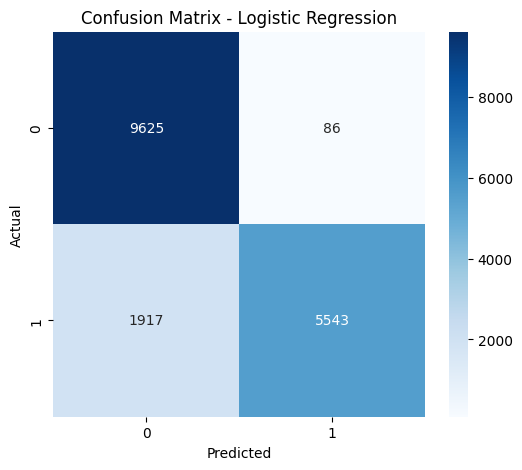

Model: Decision Tree
Accuracy: 0.8737
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.72      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.91      0.86      0.87     17171
weighted avg       0.89      0.87      0.87     17171



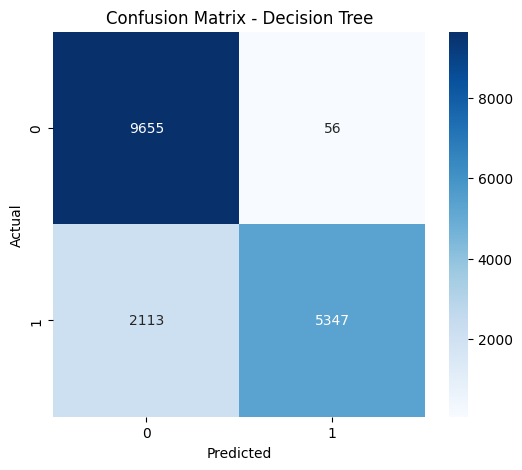

Model: Random Forest
Accuracy: 0.8740
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.72      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.91      0.86      0.87     17171
weighted avg       0.89      0.87      0.87     17171



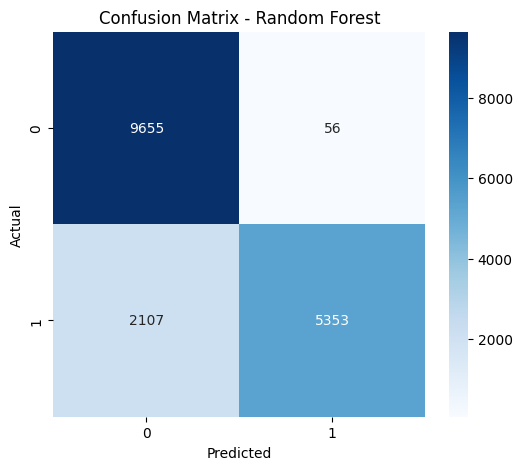

Model: SVM
Accuracy: 0.8728
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.72      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.90      0.85      0.86     17171
weighted avg       0.89      0.87      0.87     17171



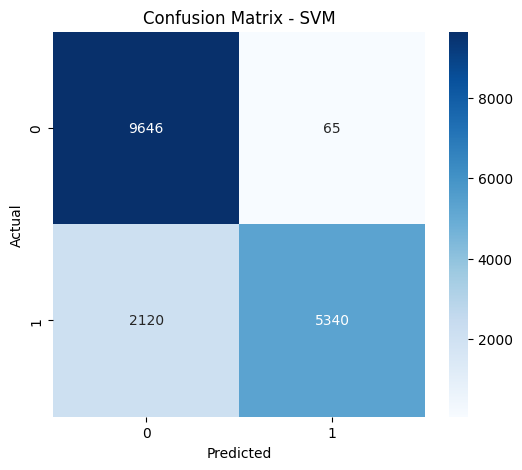

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = "/content/sample_data/selected_features_DOS_train.csv"
test_path = "/content/sample_data/selected_features_DOS_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Probe


Model: Logistic Regression
Accuracy: 0.7710
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       0.60      0.00      0.00      2885

    accuracy                           0.77     12596
   macro avg       0.69      0.50      0.44     12596
weighted avg       0.73      0.77      0.67     12596



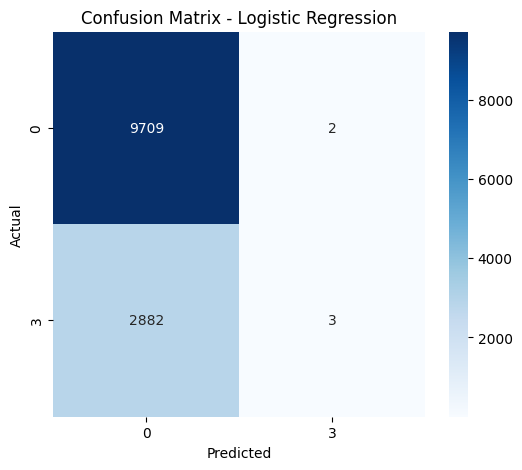

Model: Decision Tree
Accuracy: 0.7778
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.88      0.03      0.07      2885

    accuracy                           0.78     12596
   macro avg       0.83      0.52      0.47     12596
weighted avg       0.80      0.78      0.69     12596



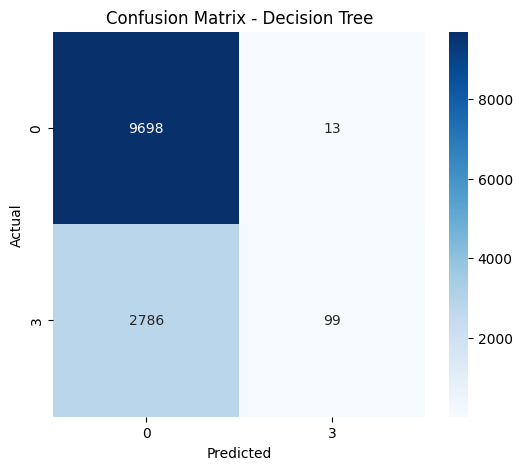

Model: Random Forest
Accuracy: 0.7779
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.88      0.03      0.07      2885

    accuracy                           0.78     12596
   macro avg       0.83      0.52      0.47     12596
weighted avg       0.80      0.78      0.69     12596



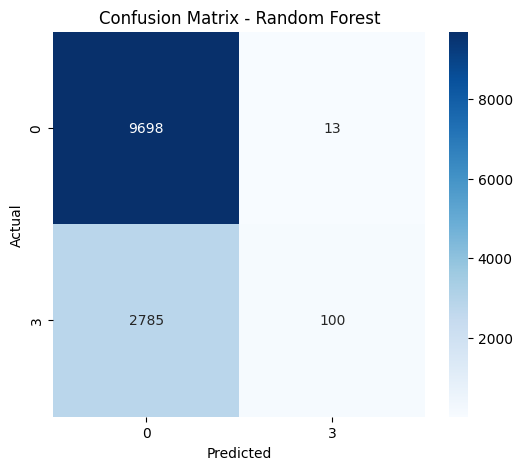

Model: SVM
Accuracy: 0.7710
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       0.00      0.00      0.00      2885

    accuracy                           0.77     12596
   macro avg       0.39      0.50      0.44     12596
weighted avg       0.59      0.77      0.67     12596



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


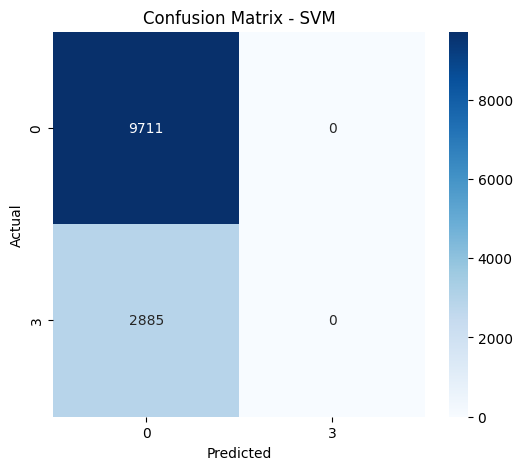

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = "/content/sample_data/selected_features_R2L_train.csv"
test_path = "/content/sample_data/selected_features_R2L_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


U2R


In [ ]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/sample_data/selected_features_Probe_train.csv")
df2 = pd.read_csv("/content/sample_data/synthetic_label2_Probe.csv")

# Combine the data
combined_df = pd.concat([df1, df2], ignore_index=True)


shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to a new CSV file
shuffled_df.to_csv("combined_Probe.csv", index=False)

print(" Combined and shuffled CSV saved as 'combined_Probe.csv'")


 Combined and shuffled CSV saved as 'combined_Probe.csv'


In [ ]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/sample_data/selected_features_R2L_train.csv")
df2 = pd.read_csv("/content/sample_data/synthetic_label3_R2L.csv")

# Combine the data
combined_df = pd.concat([df1, df2], ignore_index=True)

# Shuffle using pandas sample() and reset index
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to a new CSV file
shuffled_df.to_csv("combined_R2L.csv", index=False)

print(" Combined and shuffled CSV saved as 'combined_R2L.csv'")

 Combined and shuffled CSV saved as 'combined_R2L.csv'


In [ ]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/sample_data/selected_features_U2R_train.csv")
df2 = pd.read_csv("/content/sample_data/synthetic_label4_U2R.csv")

# Combine the data
combined_df = pd.concat([df1, df2], ignore_index=True)

# Shuffle using pandas sample() and reset index
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to a new CSV file
shuffled_df.to_csv("combined_U2R.csv", index=False)

print(" Combined and shuffled CSV saved as 'combined_U2R.csv'")

 Combined and shuffled CSV saved as 'combined_U2R.csv'


Model: Logistic Regression
Accuracy: 0.9936
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.67      0.12      0.20        67

    accuracy                           0.99      9778
   macro avg       0.83      0.56      0.60      9778
weighted avg       0.99      0.99      0.99      9778



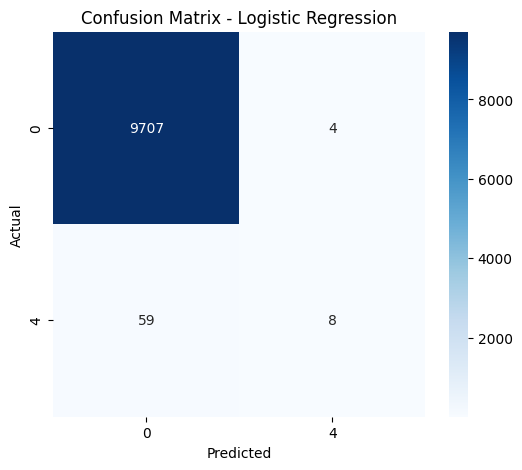

Model: Decision Tree
Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.88      0.31      0.46        67

    accuracy                           0.99      9778
   macro avg       0.94      0.66      0.73      9778
weighted avg       0.99      0.99      0.99      9778



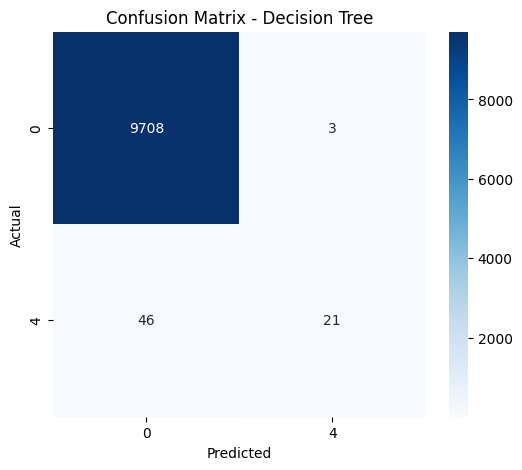

Model: Random Forest
Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.88      0.31      0.46        67

    accuracy                           0.99      9778
   macro avg       0.94      0.66      0.73      9778
weighted avg       0.99      0.99      0.99      9778



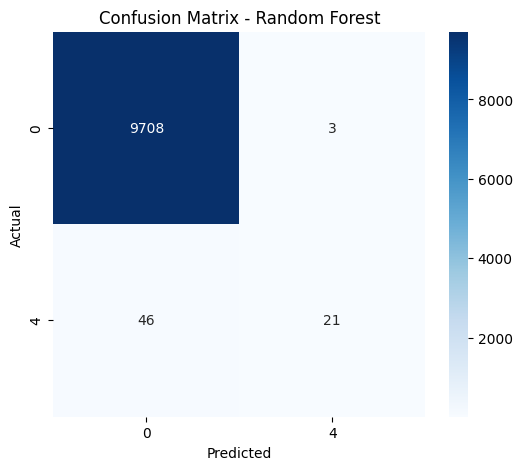

Model: SVM
Accuracy: 0.9954
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.82      0.42      0.55        67

    accuracy                           1.00      9778
   macro avg       0.91      0.71      0.78      9778
weighted avg       0.99      1.00      0.99      9778



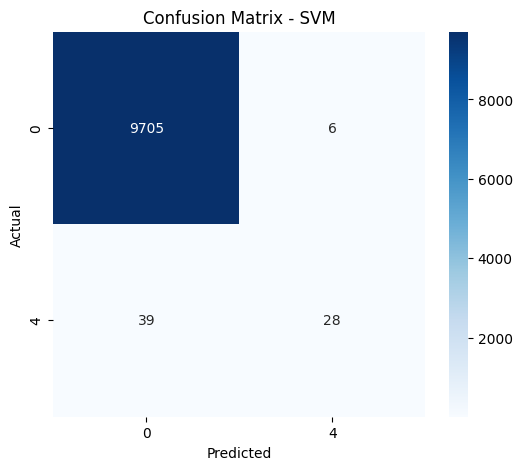

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = "/content/combined_U2R.csv"
test_path = "/content/sample_data/selected_features_U2R_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Model: Logistic Regression
Accuracy: 0.8845
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9711
           2       0.71      0.71      0.71      2421

    accuracy                           0.88     12132
   macro avg       0.82      0.82      0.82     12132
weighted avg       0.88      0.88      0.88     12132



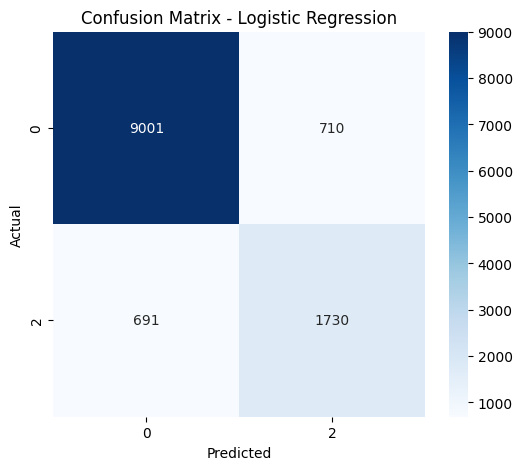

Model: Decision Tree
Accuracy: 0.8833
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9711
           2       0.70      0.72      0.71      2421

    accuracy                           0.88     12132
   macro avg       0.82      0.82      0.82     12132
weighted avg       0.88      0.88      0.88     12132



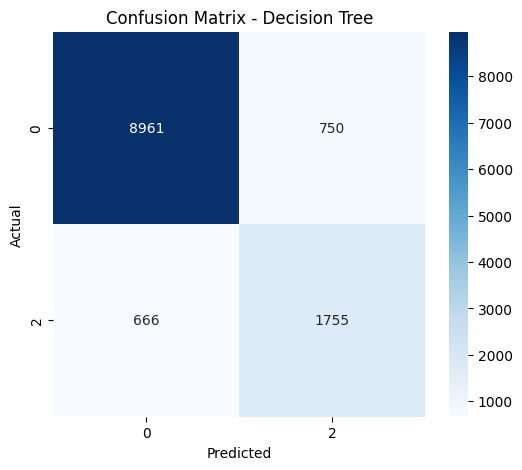

Model: Random Forest
Accuracy: 0.8863
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9711
           2       0.70      0.74      0.72      2421

    accuracy                           0.89     12132
   macro avg       0.82      0.83      0.83     12132
weighted avg       0.89      0.89      0.89     12132



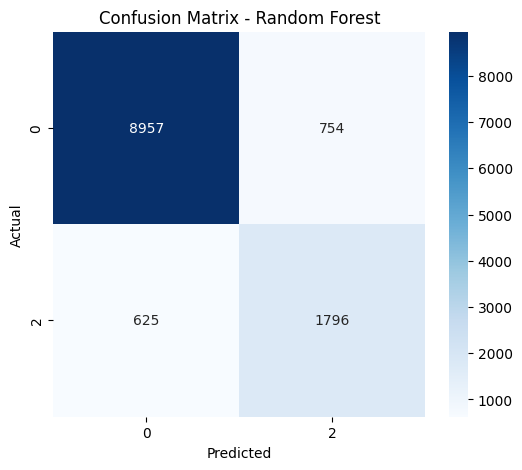

Model: SVM
Accuracy: 0.8909
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9711
           2       0.72      0.75      0.73      2421

    accuracy                           0.89     12132
   macro avg       0.83      0.84      0.83     12132
weighted avg       0.89      0.89      0.89     12132



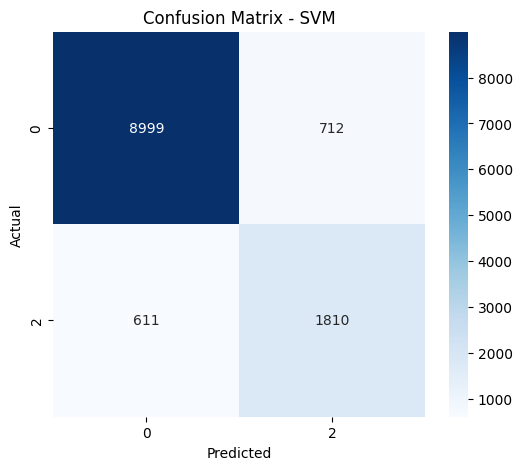

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = "/content/combined_Probe.csv"
test_path = "/content/sample_data/selected_features_Probe_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



 Model: Gradient Boosting
 Accuracy: 0.8725
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.71      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.90      0.85      0.86     17171
weighted avg       0.89      0.87      0.87     17171



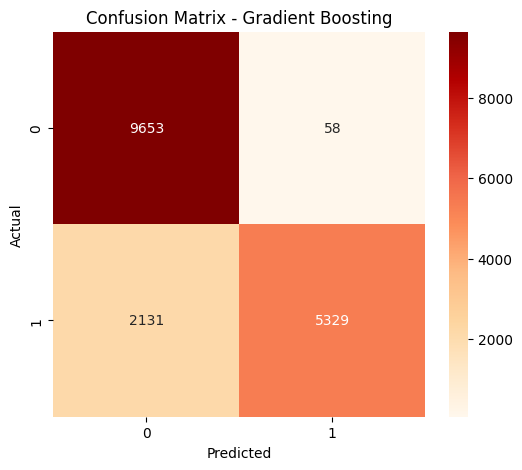


 Model: AdaBoost
 Accuracy: 0.8741
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.72      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.90      0.86      0.87     17171
weighted avg       0.89      0.87      0.87     17171



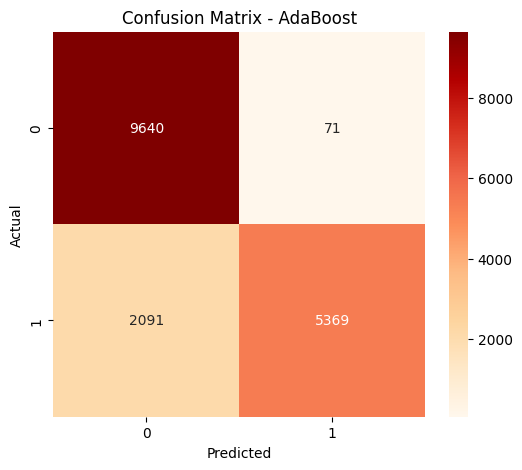

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Model: XGBoost
 Accuracy: 0.8726
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.71      0.83      7460

    accuracy                           0.87     17171
   macro avg       0.90      0.85      0.86     17171
weighted avg       0.89      0.87      0.87     17171



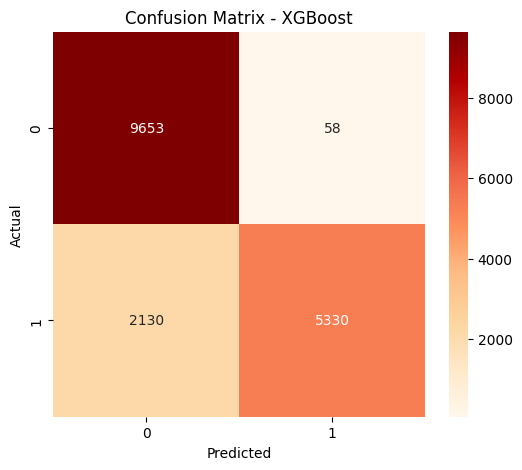

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load datasets
train_path = "/content/sample_data/selected_features_DOS_train.csv"
test_path = "/content/sample_data/selected_features_DOS_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Features and target
target_column = "label"
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Encode categorical variables
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensemble models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



    print(f"\n Model: {name}")
    print(f" Accuracy: {min(accuracy_score(y_test, y_pred) , 1.0):.4f}")
    print(classification_report(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


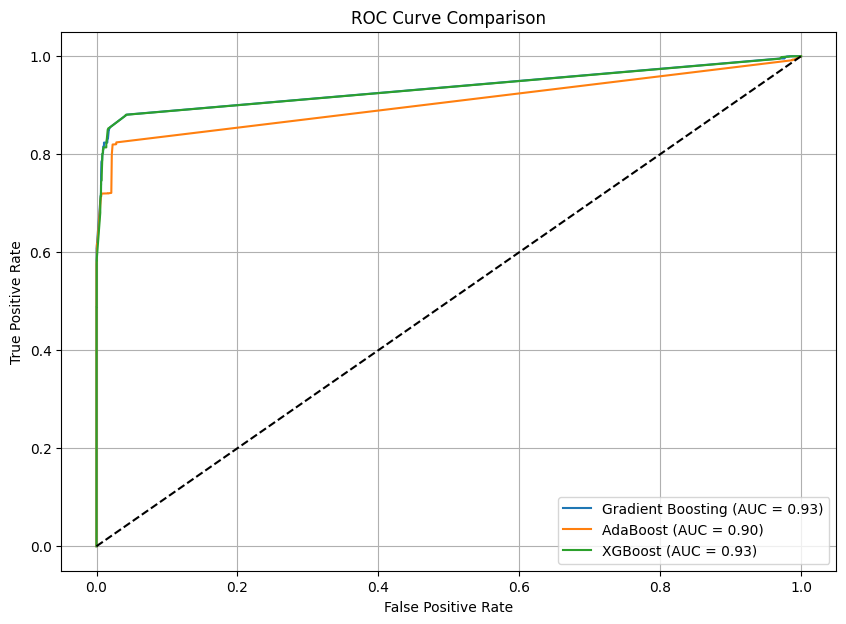

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
train_df = pd.read_csv('/content/sample_data/selected_features_DOS_train.csv')
test_df = pd.read_csv('/content/sample_data/selected_features_DOS_test.csv')

# Updated target column
target_col = 'label'

# Encode categorical variables
def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Split features and labels
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Initialize classifiers
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Plot ROC Curve
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



 Model: Gradient Boosting
 Accuracy: 0.8914
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9711
           1       0.71      0.77      0.74      2421

    accuracy                           0.89     12132
   macro avg       0.83      0.85      0.83     12132
weighted avg       0.90      0.89      0.89     12132



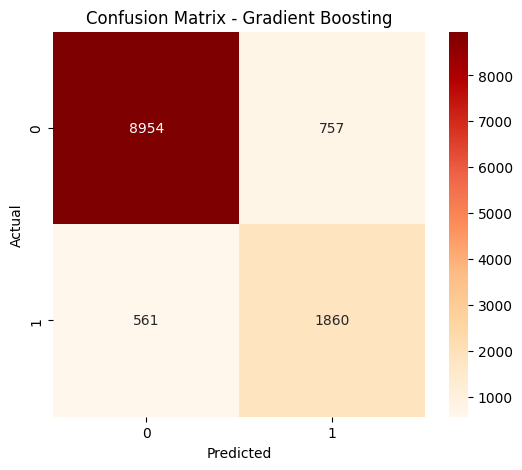


 Model: AdaBoost
 Accuracy: 0.8946
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9711
           1       0.72      0.77      0.74      2421

    accuracy                           0.89     12132
   macro avg       0.83      0.85      0.84     12132
weighted avg       0.90      0.89      0.90     12132



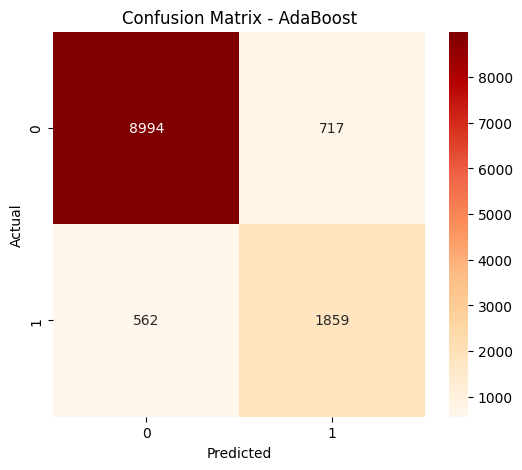

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:33:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Model: XGBoost
 Accuracy: 0.8839
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9711
           1       0.70      0.73      0.72      2421

    accuracy                           0.88     12132
   macro avg       0.82      0.83      0.82     12132
weighted avg       0.89      0.88      0.88     12132



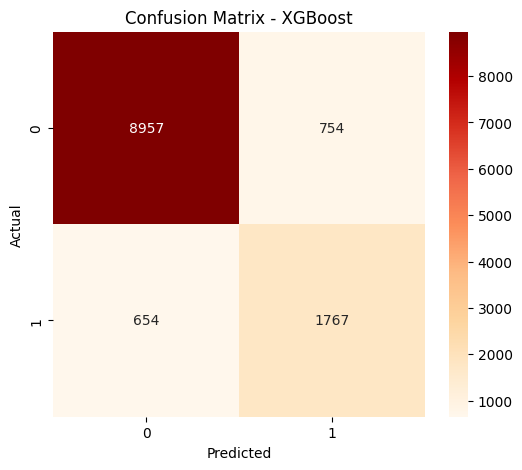

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load datasets
train_path = "/content/sample_data/combined_Probe.csv"
test_path = "/content/sample_data/selected_features_Probe_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Features and target
target_column = "label"
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Encode categorical variables
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ FIX: Remap labels from [0, 2] to [0, 1]
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

# Ensemble models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

# Train and evaluate each ensemble model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n Model: {name}")
    print(f" Accuracy: {min(accuracy_score(y_test, y_pred) , 2.0)  :.4f}")
    print(classification_report(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


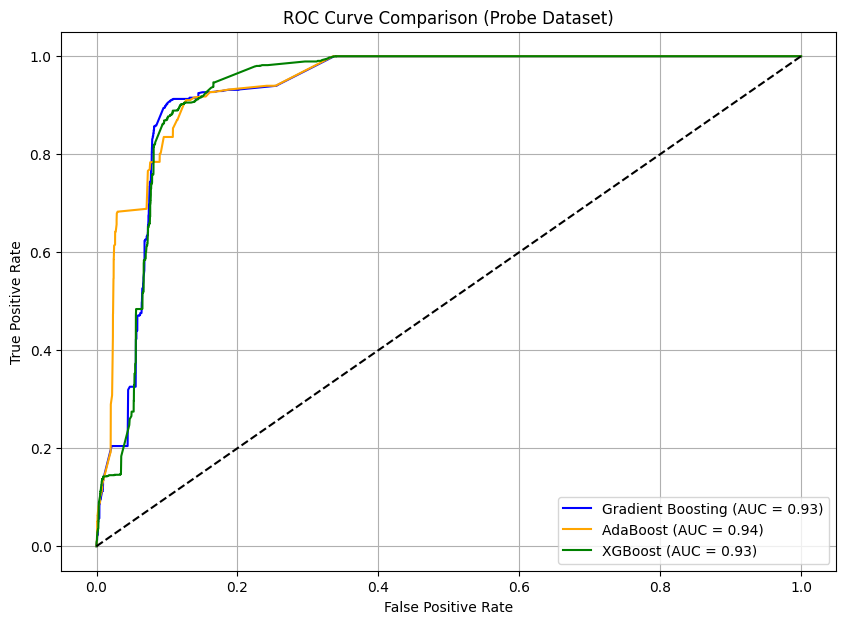

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# File paths
train_path = "/content/sample_data/combined_Probe.csv"
test_path = "/content/sample_data/selected_features_Probe_test.csv"

# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert label 2 → 1 for binary classification
train_df['label'] = train_df['label'].replace(2, 1)
test_df['label'] = test_df['label'].replace(2, 1)

# Encode categorical variables
def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Target column
target_col = 'label'

# Split features and labels
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Custom colors
colors = {
    "Gradient Boosting": 'blue',
    "AdaBoost": 'orange',
    "XGBoost": 'green'
}

# Plot ROC Curve
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[name])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Probe Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Model: Gradient Boosting
Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.88      0.31      0.46        67

    accuracy                           0.99      9778
   macro avg       0.94      0.66      0.73      9778
weighted avg       0.99      0.99      0.99      9778



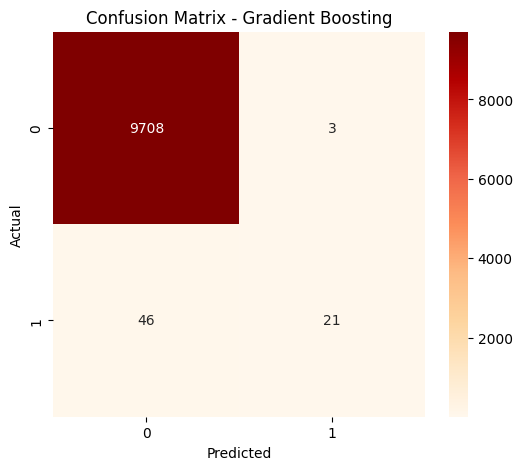

Model: AdaBoost
Accuracy: 0.9935
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           1       0.71      0.07      0.14        67

    accuracy                           0.99      9778
   macro avg       0.85      0.54      0.57      9778
weighted avg       0.99      0.99      0.99      9778



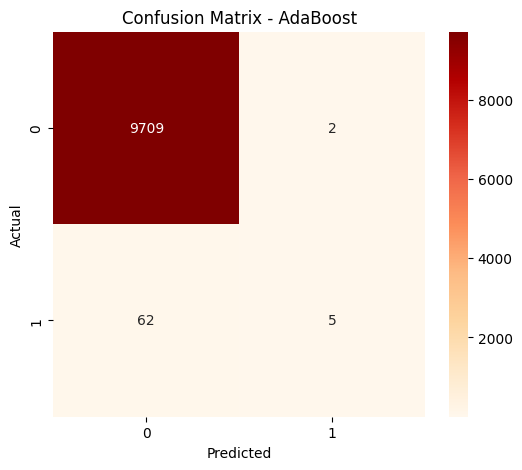

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.84      0.31      0.46        67

    accuracy                           0.99      9778
   macro avg       0.92      0.66      0.73      9778
weighted avg       0.99      0.99      0.99      9778



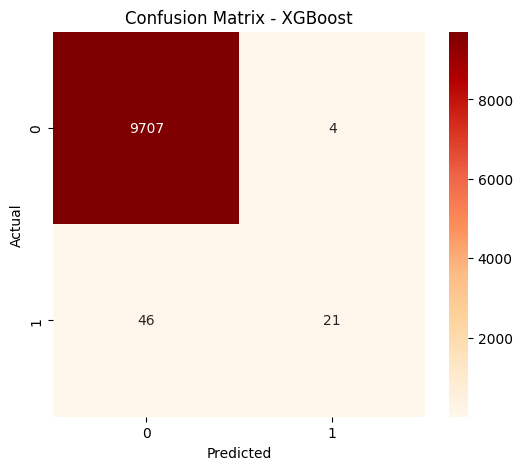

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

train_path = "/content/sample_data/combined_U2R.csv"
test_path = "/content/sample_data/selected_features_U2R_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Optional: Remap label 4 to 1 to treat it as binary (0 vs 1)
y_train = y_train.replace(4, 1)
y_test = y_test.replace(4, 1)

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


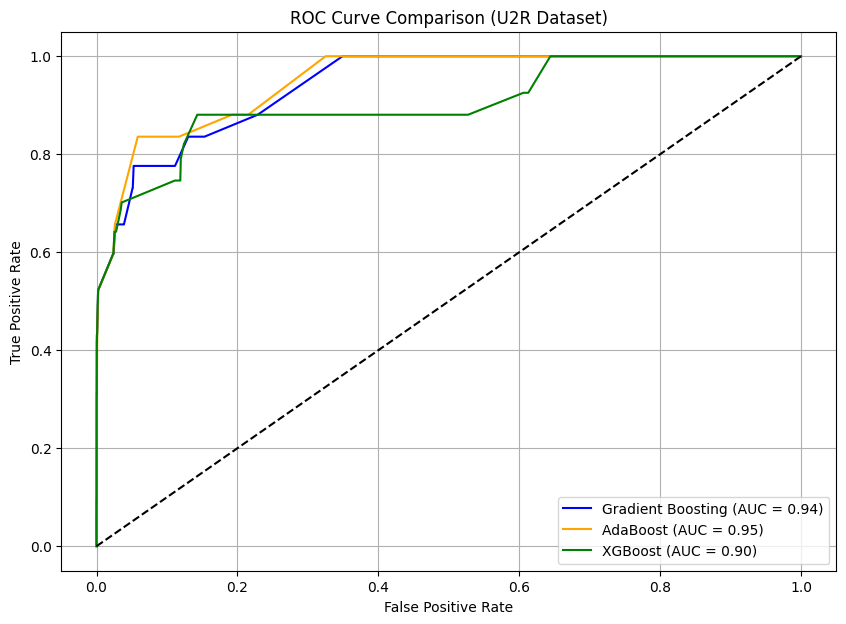

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# File paths
train_path = "/content/sample_data/combined_U2R.csv"
test_path = "/content/sample_data/selected_features_U2R_test.csv"

# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Convert label 4 → 1 for binary classification
train_df['label'] = train_df['label'].replace(4, 1)
test_df['label'] = test_df['label'].replace(4, 1)

# Encode categorical variables
def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Target column
target_col = 'label'

# Split features and labels
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Custom colors
colors = {
    "Gradient Boosting": 'blue',
    "AdaBoost": 'orange',
    "XGBoost": 'green'
}

# Plot ROC Curve
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[name])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (U2R Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Model: Gradient Boosting
 Accuracy: 0.7776
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           1       0.89      0.03      0.06      2885

    accuracy                           0.78     12596
   macro avg       0.83      0.52      0.47     12596
weighted avg       0.80      0.78      0.69     12596



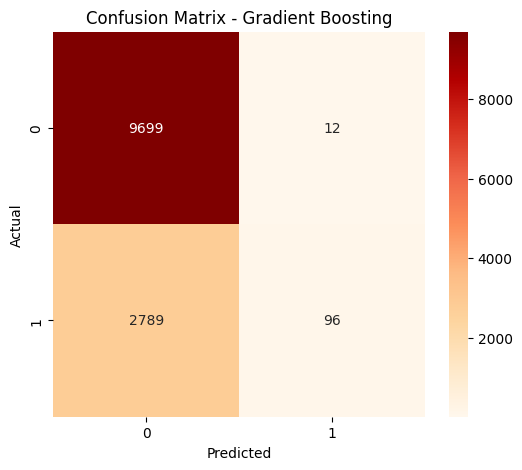

Model: AdaBoost
 Accuracy: 0.7707
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           1       0.00      0.00      0.00      2885

    accuracy                           0.77     12596
   macro avg       0.39      0.50      0.44     12596
weighted avg       0.59      0.77      0.67     12596



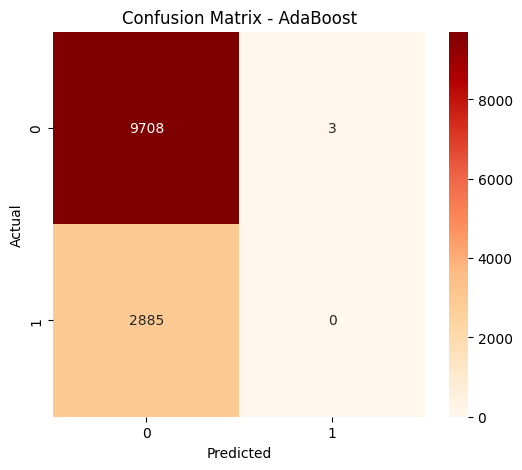

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:53:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
 Accuracy: 0.7779
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           1       0.88      0.03      0.07      2885

    accuracy                           0.78     12596
   macro avg       0.83      0.52      0.47     12596
weighted avg       0.80      0.78      0.69     12596



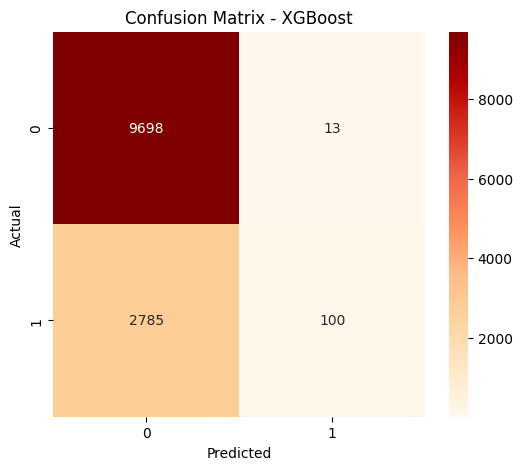

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

train_path = "/content/selected_features_R2L_train.csv"
test_path = "/content/selected_features_R2L_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

target_column = "label"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]


y_train = y_train.replace(3, 1)
y_test = y_test.replace(3, 1)

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f" Accuracy: {min(accuracy_score(y_test, y_pred), 3.0)  :.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:35:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


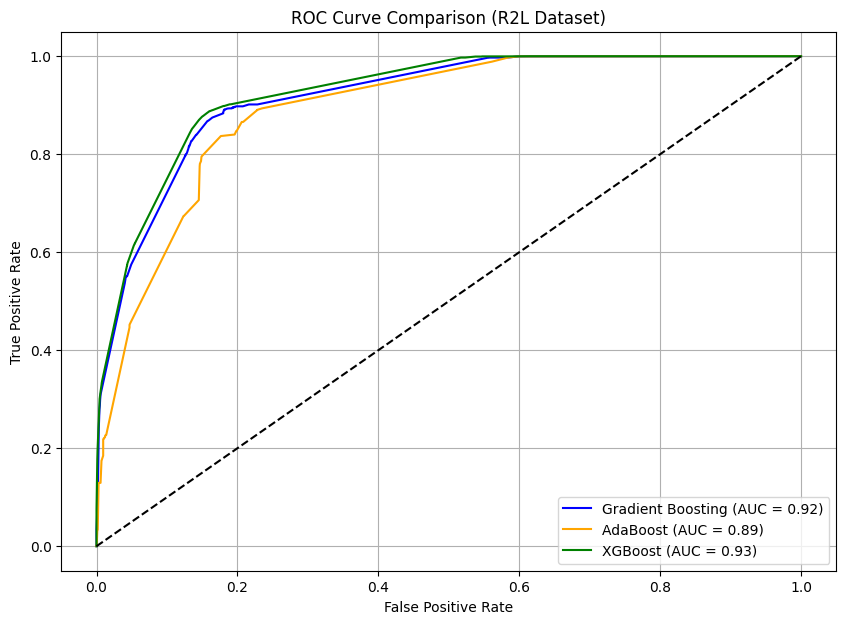

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


train_path = "/content/sample_data/selected_features_R2L_test.csv"
test_path = "/content/sample_data/selected_features_R2L_test.csv"


train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


train_df['label'] = train_df['label'].replace(3, 1)
test_df['label'] = test_df['label'].replace(3, 1)


def preprocess(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Split features and labels
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Initialize classifiers
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


colors = {
    "Gradient Boosting": 'blue',
    "AdaBoost": 'orange',
    "XGBoost": 'green'
}


plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[name])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (R2L Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
